In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression


In [59]:
iris=sns.load_dataset('iris')

In [60]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris.shape

(150, 5)

In [31]:
iris['species'].nunique()

3

In [32]:
iris['petal_length'].mean()

3.7580000000000005

In [33]:
iris['sepal_length'].max()

7.9

In [34]:
iris['petal_width'].min()

0.1

Text(0.5, 1.0, 'Scatter plot on Iris Dataset')

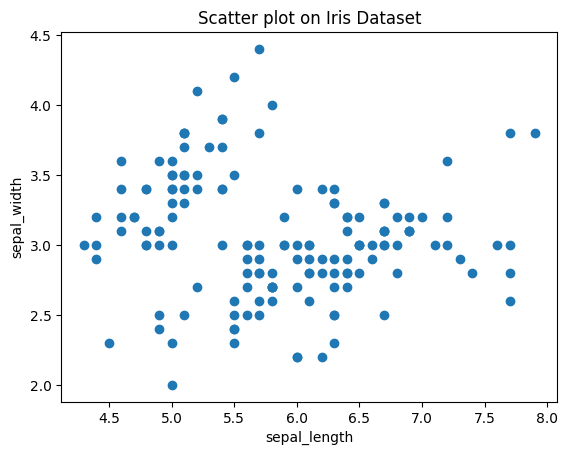

In [35]:
#Scatter Plot
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter plot on Iris Dataset')

Text(0.5, 1.0, 'Scatter plot on Iris Dataset')

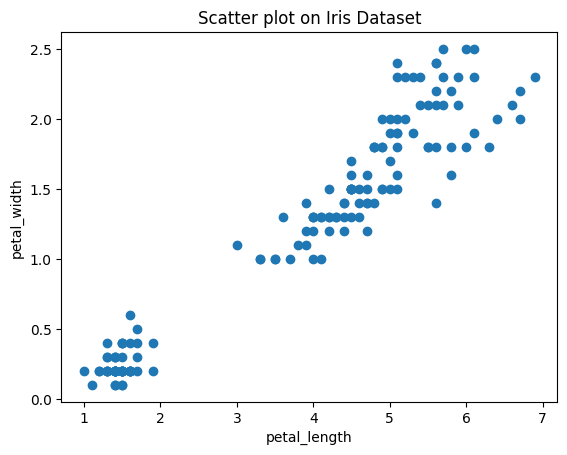

In [36]:
plt.scatter(iris['petal_length'],iris['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter plot on Iris Dataset')

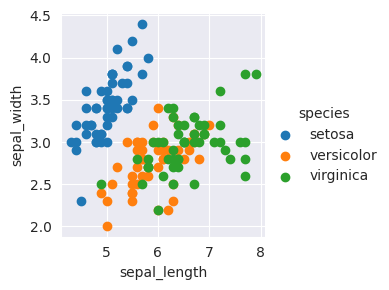

In [37]:
sns.set_style("darkgrid")
sns.FacetGrid(iris, hue='species').map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.show()

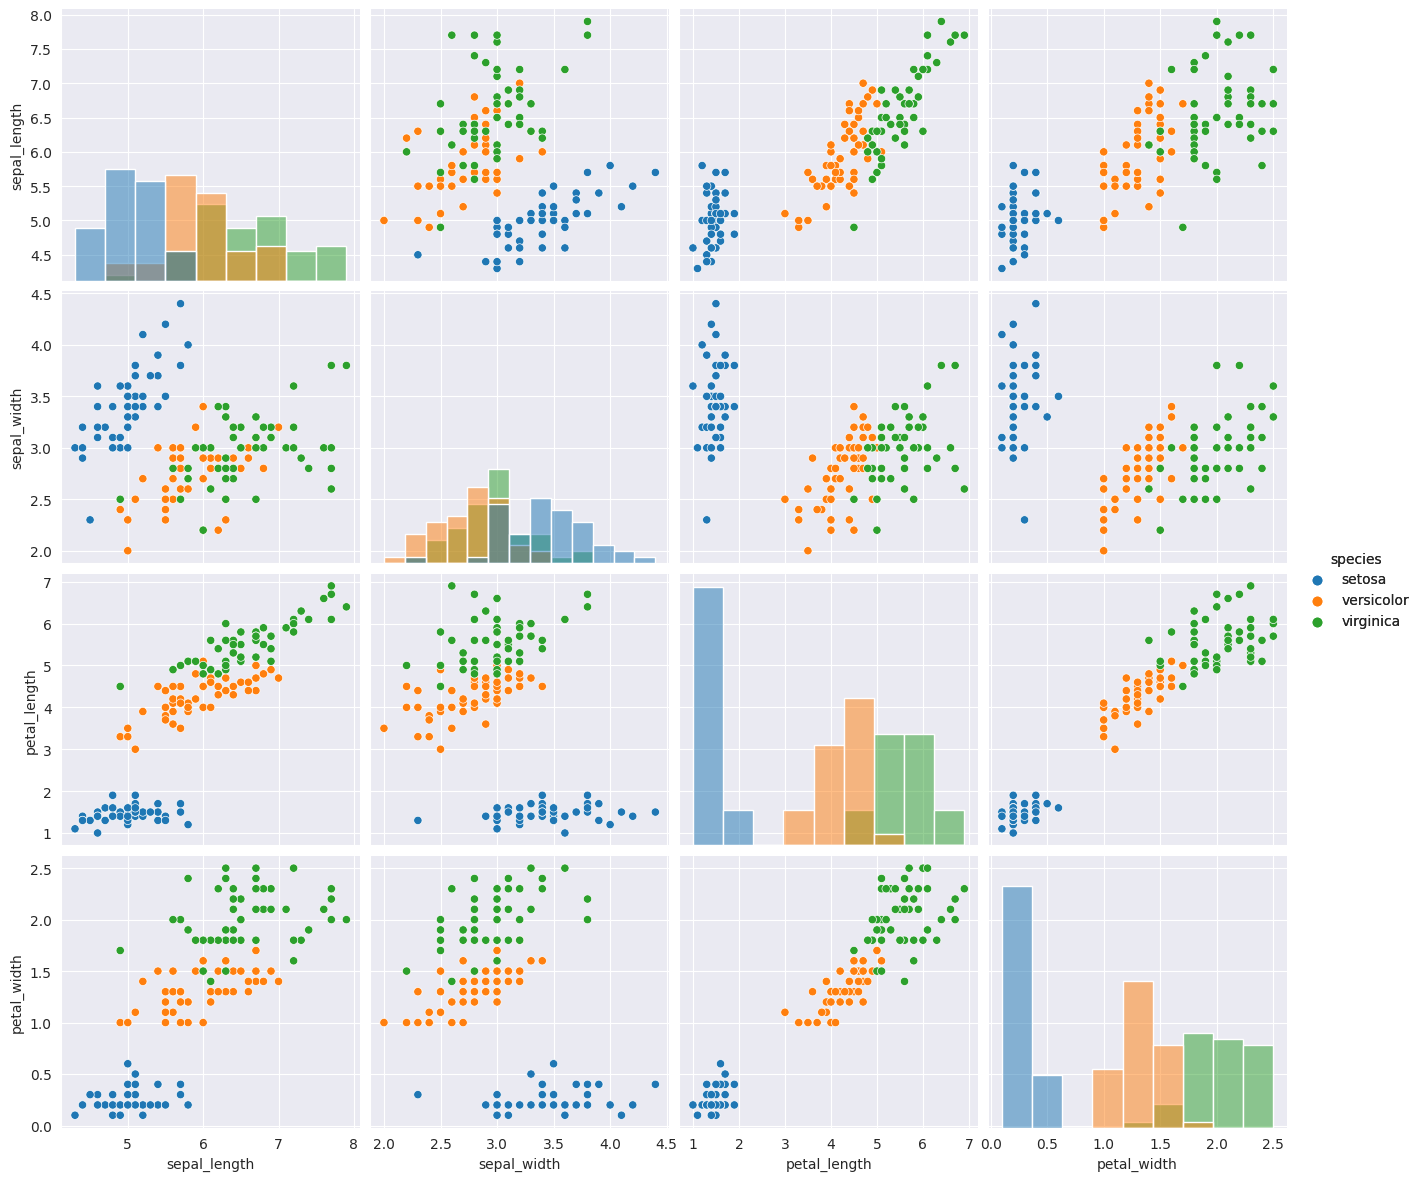

In [38]:
sns.set_style("darkgrid")
sns.pairplot(iris, hue='species', height=3, diag_kind="hist").add_legend()
plt.show()

<Axes: ylabel='sepal_length'>

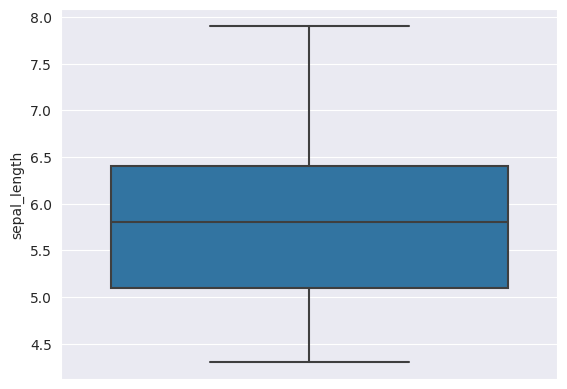

In [39]:
sns.boxplot(y="sepal_length", data=iris)

<Axes: ylabel='petal_length'>

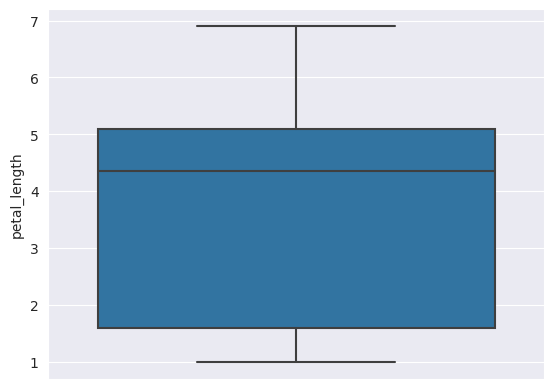

In [40]:
sns.boxplot(y="petal_length", data=iris)

<Axes: xlabel='species', ylabel='sepal_length'>

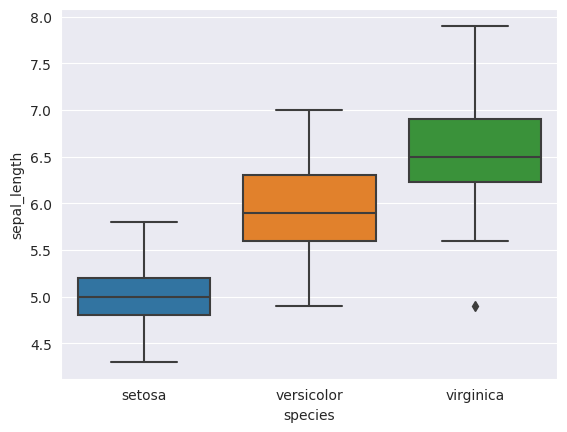

In [41]:
sns.boxplot(x="species", y="sepal_length", data=iris)

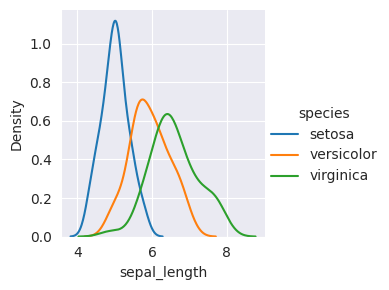

In [42]:
#Kernel Distribution Estimate
sns.FacetGrid(iris, hue="species", height=3)\
   .map(sns.kdeplot, "sepal_length")\
   .add_legend()
plt.show()

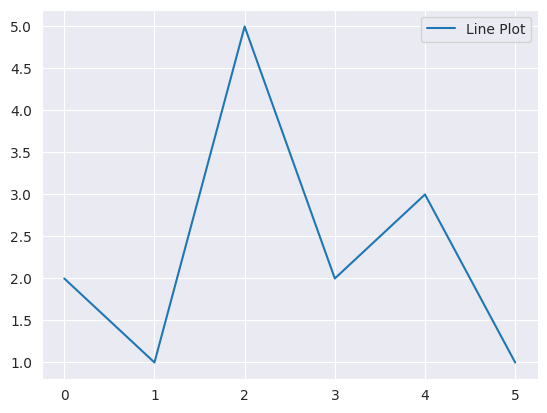

In [43]:
#Line Plot
y=[2,1,5,2,3,1]
plt.plot(y, label="Line Plot")
plt.legend()
plt.show()

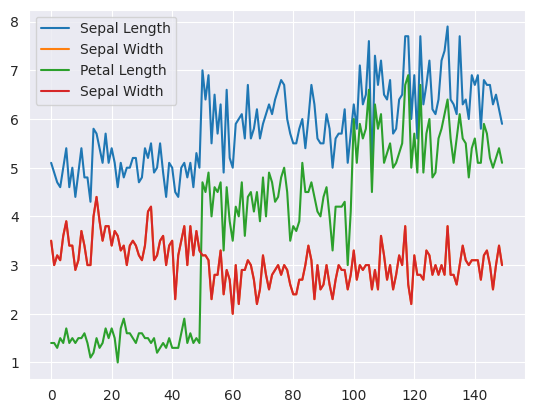

In [44]:
plt.plot(iris['sepal_length'], label="Sepal Length")
plt.plot(iris['sepal_width'], label="Sepal Width")
plt.plot(iris['petal_length'], label="Petal Length")
plt.plot(iris['sepal_width'], label="Sepal Width")
plt.legend()
plt.show()

In [45]:
iris.corr()

<ipython-input-45-156dd03bc859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<ipython-input-46-5b2fb7f6e6c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr())


<Axes: >

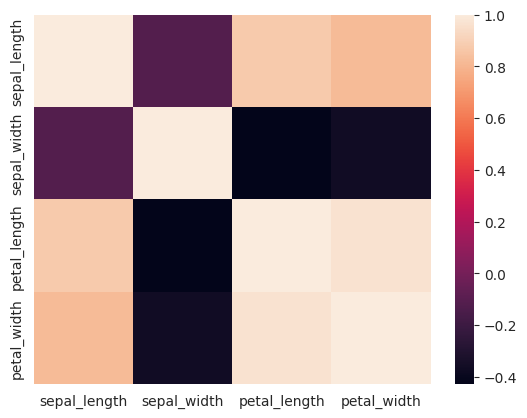

In [46]:
sns.heatmap(iris.corr())

<ipython-input-47-fb70caa0f350>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True)


<Axes: >

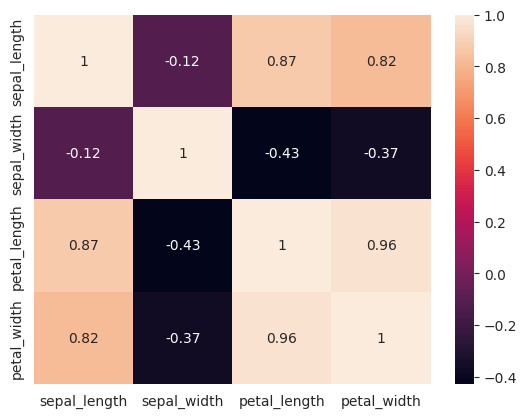

In [47]:
sns.heatmap(iris.corr(),annot=True)

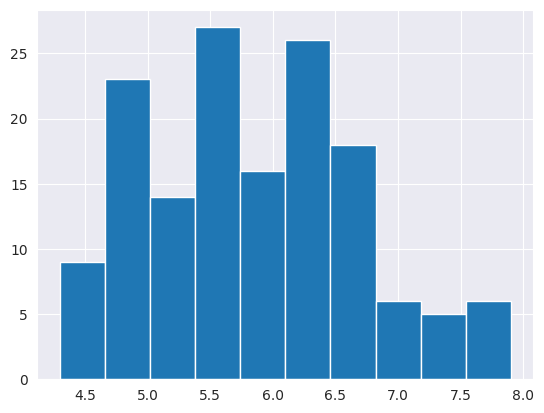

In [49]:
plt.hist(iris['sepal_length'], bins=10)
plt.show()

In [51]:
X=iris.drop(['species'],axis=1)

In [52]:
Y=iris['species']

In [54]:
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X , Y , test_size=0.2)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X , Y , test_size=0.2 , random_state=1)

In [74]:
lr = LogisticRegression(solver = 'newton-cg')

In [75]:
lr.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [76]:
y_pred1= lr.predict(x_test)

In [77]:
confusion_matrix(y_test, y_pred1)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(0.5, 23.52222222222222, 'Predicted Label')

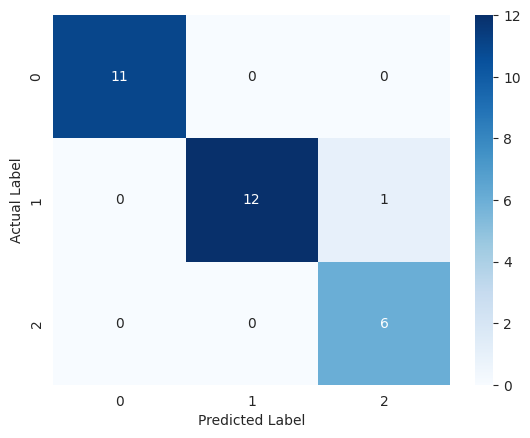

In [92]:
sns.heatmap(data=confusion_matrix(y_test, y_pred1), annot=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [78]:
accuracy_score(y_test , y_pred1)

0.9666666666666667

In [86]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)



DecisionTreeClassifier()

In [88]:
y_pred2=dtree.predict(x_test)

In [89]:
confusion_matrix(y_test, y_pred2)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(0.5, 23.52222222222222, 'Predicted Label')

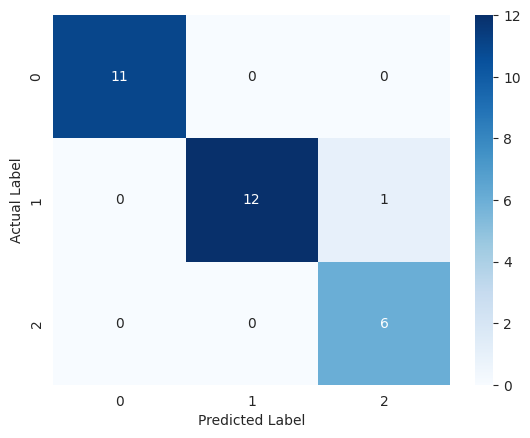

In [90]:
sns.heatmap(data=confusion_matrix(y_test, y_pred2), annot=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [91]:
accuracy_score(y_test, y_pred2)

0.9666666666666667

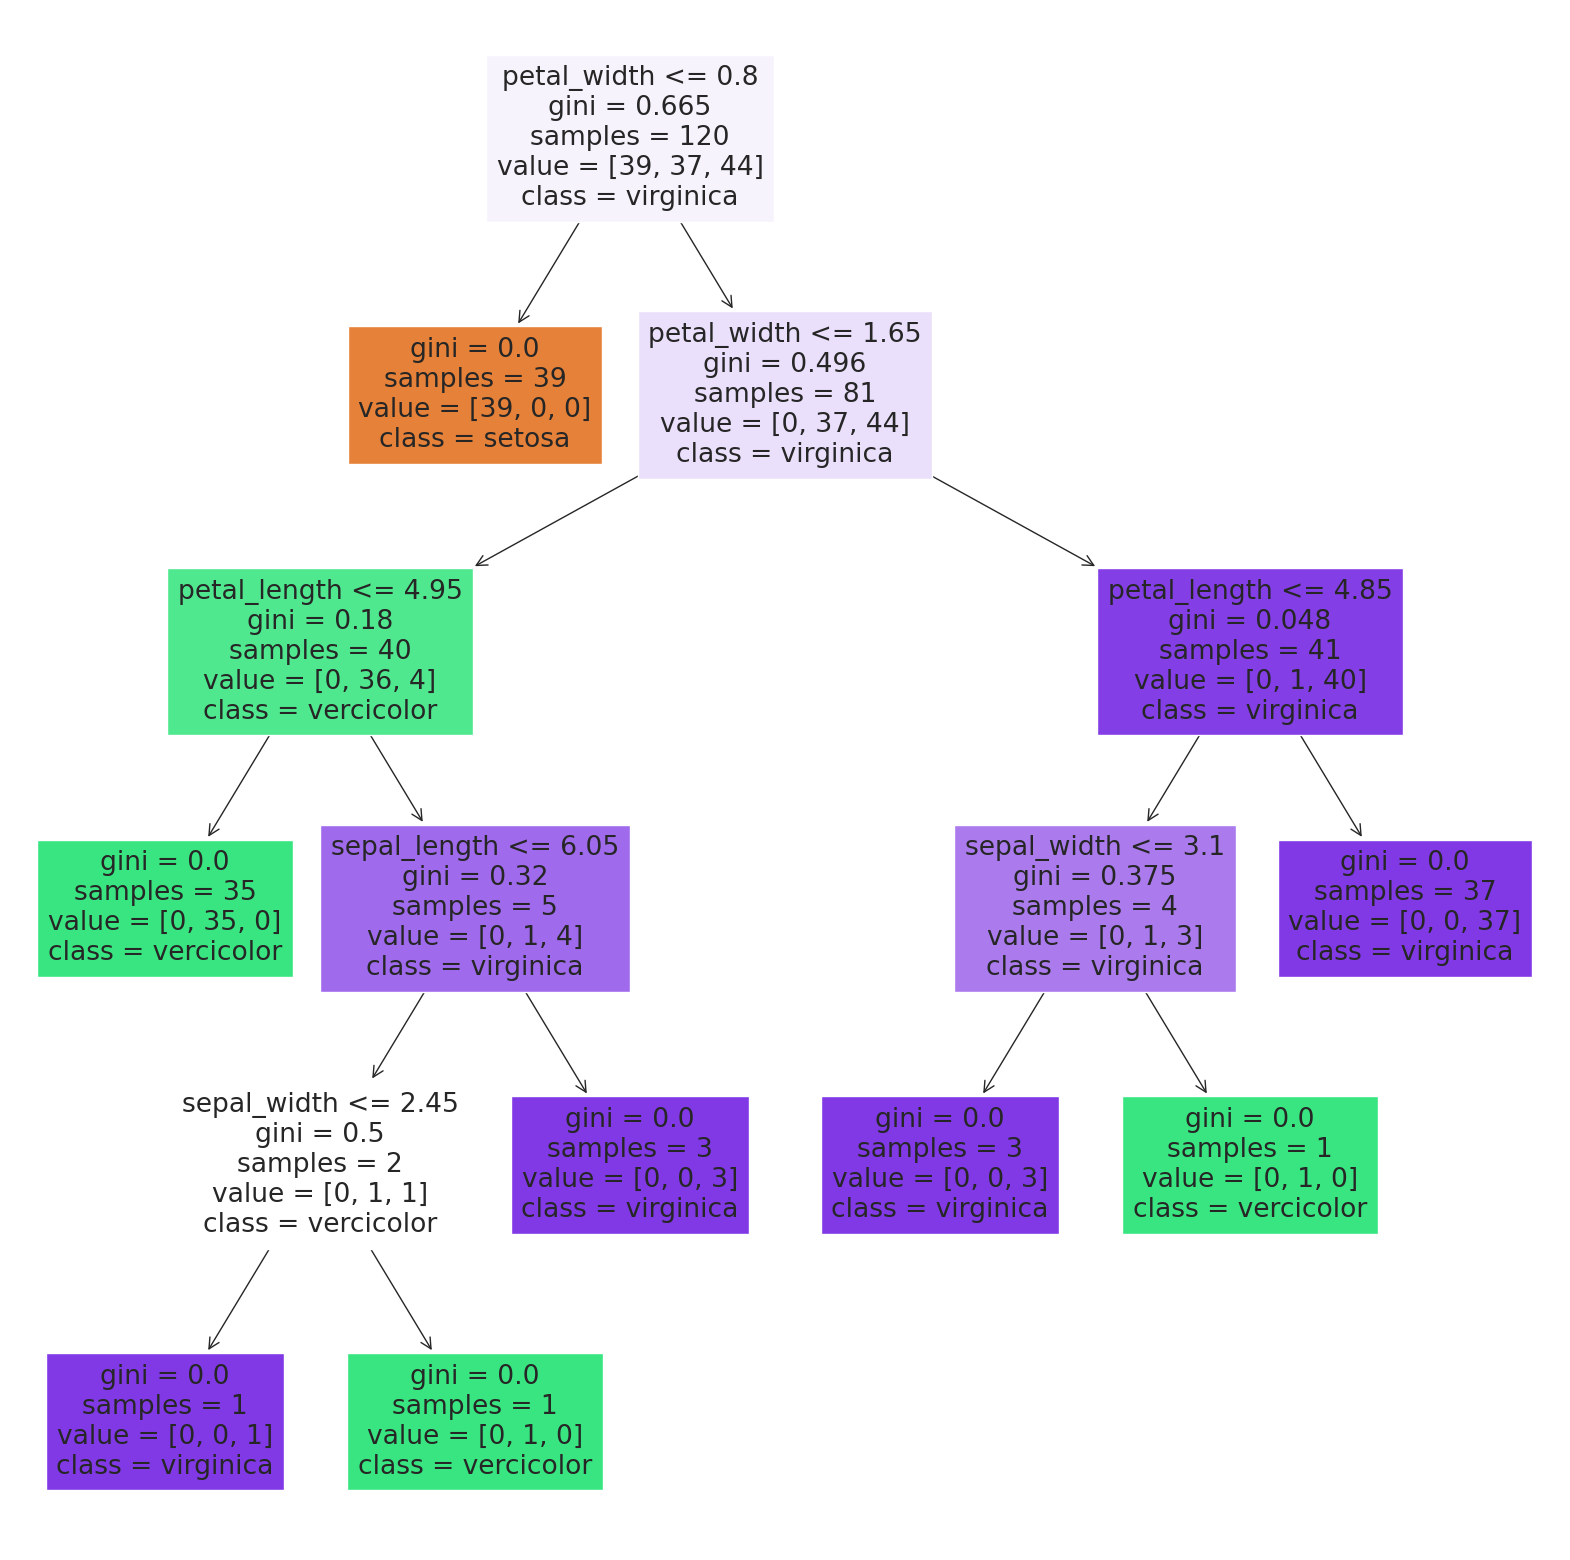

In [94]:
plt.figure(figsize=(20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names=iris.columns[:-1], class_names=["setosa","vercicolor","virginica"], filled=True)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
clf = RandomForestClassifier(n_estimators=2000)

In [100]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2000)

In [101]:
y_pred3=clf.predict(x_test)

In [103]:
confusion_matrix(y_test,y_pred3)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(0.5, 23.52222222222222, 'Predicted Label')

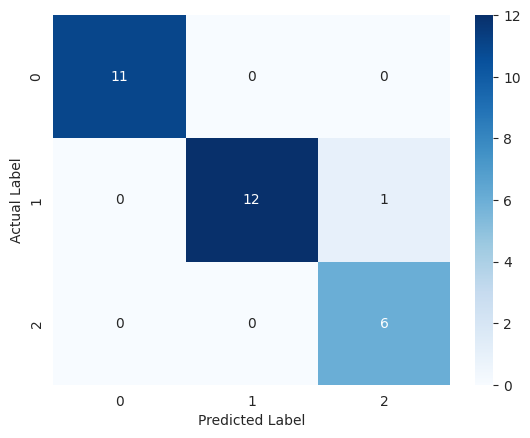

In [105]:
sns.heatmap(data=confusion_matrix(y_test, y_pred3), annot =True, cmap='Blues')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [106]:
accuracy_score(y_test, y_pred3)

0.9666666666666667